# Part I - (Ford GoBike System Data Explanation)
## by (Huda Taha Alattas)

## Introduction
> The FordBike system is a public bicycle sharing program that has been deployed in the San Francisco Bay Area and along the West Coast of California. Bay Wheels offers a broad range of bicycle sharing services at a regional scale.This data set includes information about individual rides made in a bike-sharing system.I will explore and analysis the data set to explore some insights



## Preliminary Wrangling


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [7]:
df = pd.read_csv('C:/Users/HudaALAttasJEDSA/Documents/Project 5 -FordBike Visualaztion/201902-fordgobike-tripdata.csv')
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [9]:
df['start_time'] =  pd.to_datetime(df['start_time'])
df['end_time'] =  pd.to_datetime(df['end_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [10]:
df['duration_min']=(df['end_time'] - df['start_time'])/ pd.Timedelta(minutes=1)
df.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1         42521 2019-02-28 18:53:21.789 2019-03-01 06:42:03.056   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  duration_min  
0          Male                      No    869.763833  
1           NaN                      No    708.687783  
2          Male                      No   1030.915467  
3         Other                      No    608.180533  
4          Male                     Yes     26.425417

In [11]:
df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [12]:
df['age']=2019-df['member_birth_year']
df.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1         42521 2019-02-28 18:53:21.789 2019-03-01 06:42:03.056   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  duration_min   age  
0          Male                      No    869.763833  35.0  
1           NaN                      No    708.687783   NaN  
2          Male                      No   1030.915467  47.0  
3         Other                      No    608.180533  30.0  
4          Male                     Yes     26.425417  45.0

In [13]:
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year   duration_min  \
count          183412.000000  183412.000000      175147.000000  183412.000000   
mean             -122.352250    4472.906375        1984.806437      12.109626   
std                 0.116673    1664.383394          10.116689      29.906483   
min              -122.453704      11.000000        1878.000000       1.018017   
25%              -122.411726    3777.000000        1980.000000       5.423808   
50%              -122.398279    4958.000000        1987.000000       8.577492   
75%              -122.288045    5502.000000        1992.000000      13.271950   
max              -121.874119    6645.000000        2001.000000    1424.080500   

                 age  
count  175147.000000  
mean       34.193563  
std        10.116689  
min        18.000000  
25%        27.000000  
50%        32.000000  
75%        39.000000  
max       141.000000

In [14]:
df.duplicated().sum()


0

In [15]:
df.shape

(183412, 18)

### What is the structure of your dataset?

> The data set contains 183412 enteries for the bike trips . the data contains 19 columns about trip details informations like trip duration in sec, start and end time of the trip , start and end station informations and some user related informations like gender , date of birth and user type .

### What is/are the main feature(s) of interest in your dataset?

> I'm going to focus on trip duration and how it will be effected by the other characteristics.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> * start_time - I will extact the start hour from it .
>  * user characteristics ( Age , user type , gender)
>  * member_birth_year - I will calculate the age of the user based on it

## Univariate Exploration



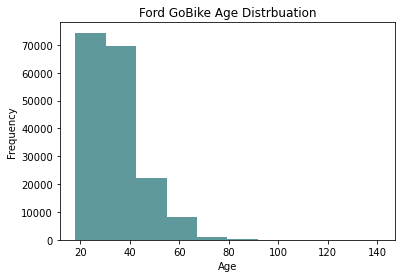

In [16]:
## Age distrbuation
df['age'].plot(kind='hist',color="#5F999C")
plt.title('Ford GoBike Age Distrbuation');
plt.xlabel('Age');

In [17]:
## Getting Age columns informations to fix the tail of the histogram
df.age.describe(percentiles = [.99])

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
50%          32.000000
99%          64.000000
max         141.000000
Name: age, dtype: float64

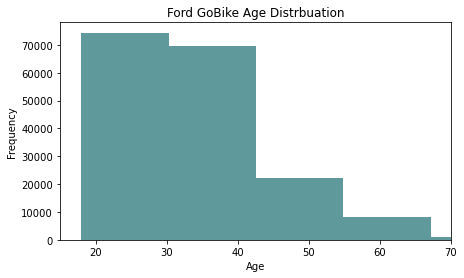

In [18]:
## age distrabutaion after fixing the tail of the histogram
plt.figure(figsize=[7,4])
plt.xlim([15, 70])
df['age'].plot(kind='hist',color="#5F999C")
plt.title('Ford GoBike Age Distrbuation');
plt.xlabel('Age');
#plt.xticks([20,30, 40, 50, 60, 70],[20,30, 40, 50, 60, 70]);

#### From The above graph, Most of Ford GoBike riders are people between 20 to 40 years old.

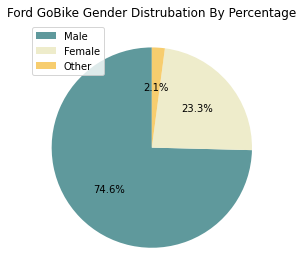

In [19]:
##Gender distrubation by percentage
labels = ['Male', 'Female', 'Other']
dataforgraph = list(df[df['member_gender'] != 'None']['member_gender'].value_counts())
colours = ["#5F999C",'#EEECCB','#F7CD6E']
#plt.figure(figsize=[13,6])
#colors=['#2b0b57','#C43C4E','#FCAA0F','#F1701F']
plt.pie(dataforgraph,autopct='%1.1f%%',startangle=90,colors=colours)
plt.legend(labels)
plt.title('Ford GoBike Gender Distrubation By Percentage')
plt.tight_layout()

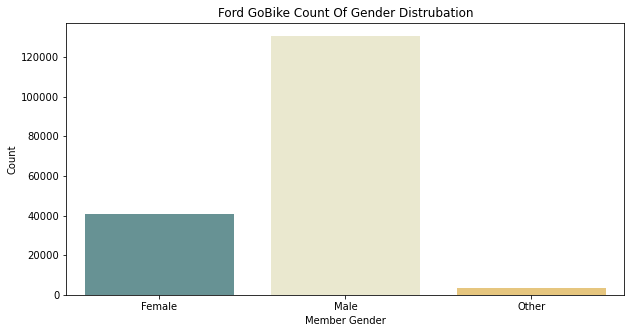

In [20]:
## Gender distrubation by count
plt.figure(figsize=[10,5])
##colours = ["#5F999C",'#EEECCB','#F7CD6E']
sns.countplot(data=df, x='member_gender',palette=["#5F999C",'#EEECCB','#F7CD6E']);
plt.title('Ford GoBike Count Of Gender Distrubation')
plt.xlabel('Member Gender');
plt.ylabel('Count');

#### From the above graph, we can notice that most rides are Males which reporesents 74.6% of the data set .

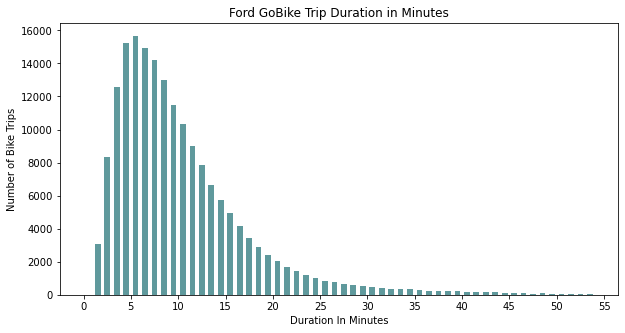

In [21]:
## Trip duration distrbutaion in mins
bin_edges = np.arange(0, 55, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45,50,55]
labels = ['{}'.format(val) for val in ticks]
plt.figure(figsize=[10,5])
plt.hist(data = df, x = 'duration_min', bins = bin_edges, rwidth = 0.6 ,color="#5F999C");
#sb.distplot(df_cleaned['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1});

plt.title("Ford GoBike Trip Duration in Minutes")
plt.xlabel('Duration In Minutes')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');

#### From above graph, we can notice that most rides takes for 5-10 minutes .

In [22]:
df.duration_min.describe(percentiles = [.99])

count    183412.000000
mean         12.109626
std          29.906483
min           1.018017
50%           8.577492
99%          57.654372
max        1424.080500
Name: duration_min, dtype: float64

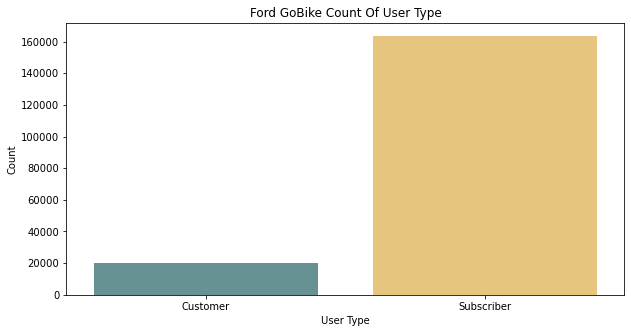

In [23]:
## User Type distrubation by count
plt.figure(figsize=[10,5])
sns.countplot(data=df, x='user_type',palette=["#5F999C",'#F7CD6E']);
plt.title('Ford GoBike Count Of User Type')
plt.xlabel('User Type');
plt.ylabel('Count');

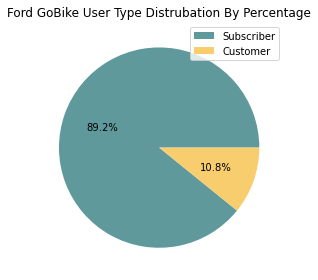

In [24]:
## User type distrbation by percentage
labels = ['Subscriber', 'Customer']
colours=["#5F999C",'#F7CD6E']
dataforgraph = list(df[df['user_type'] != 'None']['user_type'].value_counts())
#colors=['#2b0b57','#C43C4E','#FCAA0F','#F1701F']
plt.pie(dataforgraph,autopct='%1.1f%%' ,colors=colours)
plt.legend(labels)
plt.title('Ford GoBike User Type Distrubation By Percentage')
#plt.title('Popularity Of Dog Stages')
plt.tight_layout()

#### From the above graph, we can notice that most rides are Subscriber which reporesents 89.2% of the data set .

In [25]:
## Create column to extract the hour of the trip from start_time column
df['start_hour'] = df.start_time.dt.strftime('%H')
df.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1         42521 2019-02-28 18:53:21.789 2019-03-01 06:42:03.056   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  duration_min   age start_hour  
0          Male                      No    869.763833  35.0         17  
1           NaN                      No    708.687783   NaN         18  
2          Male                      No   1030.915467  47.0         12  
3         Other                      No    608.180533  30.0         17  
4          Male                     Yes     26.425417  45.0         23

In [26]:
df['start_hour'] = df['start_hour'].astype(str).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [27]:
df.to_csv("C:/Users/HudaALAttasJEDSA/Desktop/dff_FordBike.csv",index=False)

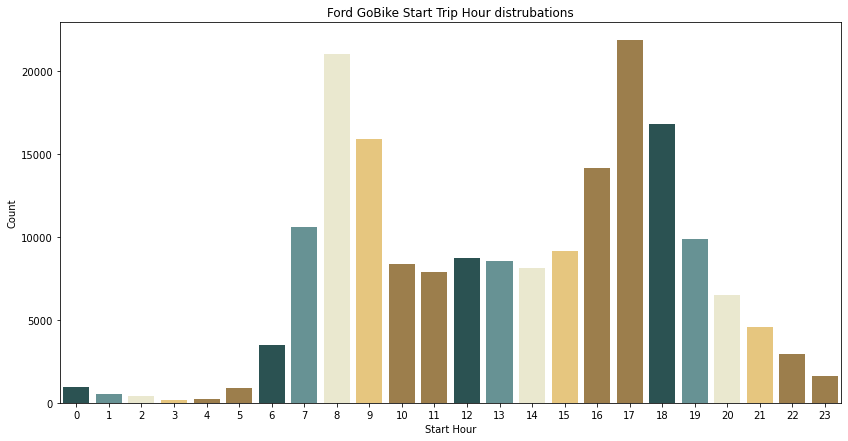

In [28]:
## Trip Hours distrubations
plt.figure(figsize=[14,7])
sns.countplot(data=df, x='start_hour',palette=['#245859',"#5F999C",'#EEECCB','#F7CD6E','#A9823F','#A9823F']);
plt.title('Ford GoBike Start Trip Hour distrubations')
plt.xlabel('Start Hour');
plt.ylabel('Count');

#### The hourly distribution shows that the most trips occur around 8-9am and 5-6pm .These findings are reflect that trips at 8-9am are more likely to be to the work or school, And trips at 5-6pm  are more likely to be from work or school. 

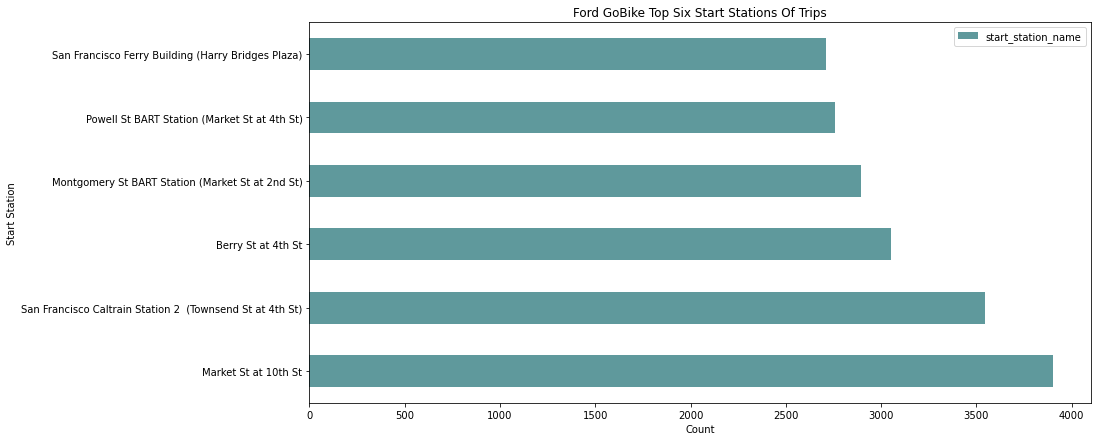

In [29]:
## Plot for top 6 start stations
df.start_station_name.value_counts().nlargest(n=6).plot(kind='barh',legend=True,figsize=(14,7),color = "#5F999C")
plt.xlabel("Count")
plt.ylabel("Start Station")
plt.title("Ford GoBike Top Six Start Stations Of Trips");

#### It can be seen from the graph above that the most popular starting station are Market St at 10th St.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>  Duration-contains outliers with unusually long usage times.

>  Age-There are outliers in the age group with users older than 100 years old.

>  Gender-has a large number of null values .

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I took the start hour out of the start-time datatime column.

> In order to have a clearer vision and a better understanding, I transformed the duration from seconds to minutes.

> I calculated  the user's age by deducting 2019 from the birth year.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

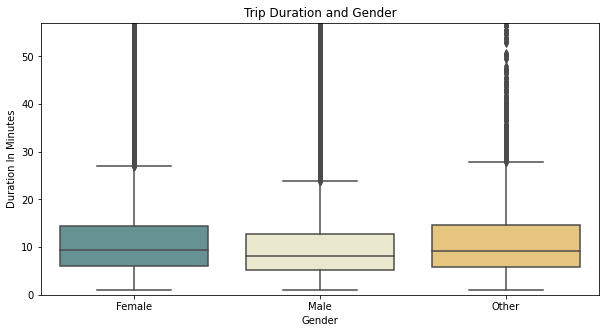

In [30]:
## box plot for Gender and Trip duration in min
plt.figure(figsize = [10, 5])
sns.boxplot(data = df, x = 'member_gender', y = 'duration_min',palette=["#5F999C",'#EEECCB','#F7CD6E'])
plt.ylim([0, 57])
plt.title('Trip Duration and Gender')
plt.xlabel('Gender')
plt.ylabel('Duration In Minutes')
plt.show()

#### Female bikers bike longer compared to male bikers

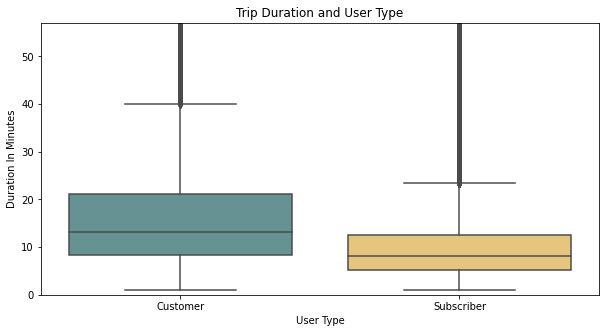

In [31]:
## box plot for user type and Trip duration in min
plt.figure(figsize = [10, 5])
sns.boxplot(data = df, x = 'user_type', y = 'duration_min',palette=["#5F999C",'#F7CD6E'])
plt.ylim([0, 57])
plt.title('Trip Duration and User Type')
plt.xlabel('User Type')
plt.ylabel('Duration In Minutes')
plt.show()

#### The above box plot demonstrates that customers have a wider range of trips for short duration

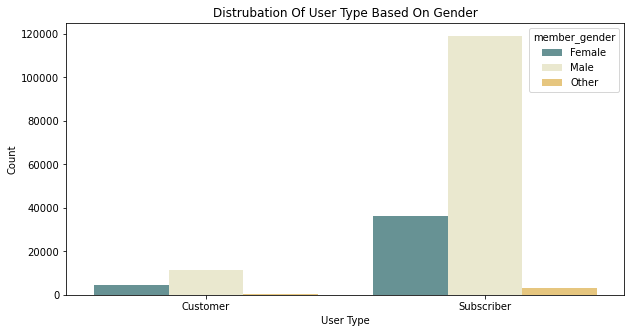

In [32]:
## Distrubation of user type based on gender
plt.figure(figsize = [10, 5])
sns.countplot(data=df, x="user_type", hue="member_gender",palette=["#5F999C",'#EEECCB','#F7CD6E'])
plt.title('Distrubation Of User Type Based On Gender')
plt.xlabel('User Type')
plt.ylabel('Count');

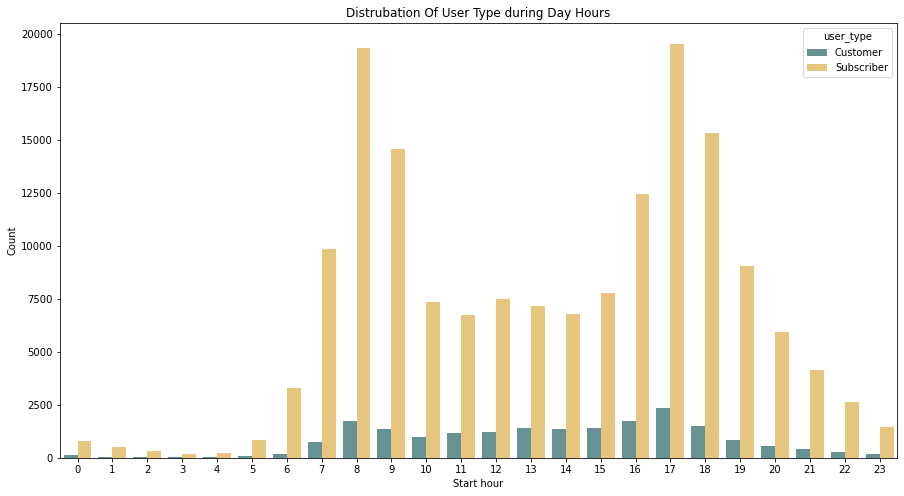

In [33]:
## Distrubation Of User Type during Day Hours
plt.figure(figsize = [15, 8])
sns.countplot(data=df, x="start_hour", hue="user_type",palette=["#5F999C",'#F7CD6E'])
plt.title('Distrubation Of User Type during Day Hours')
plt.xlabel('Start hour')
plt.ylabel('Count');

Text(0.5, 1.0, 'Relation between duration in mintues and age ')

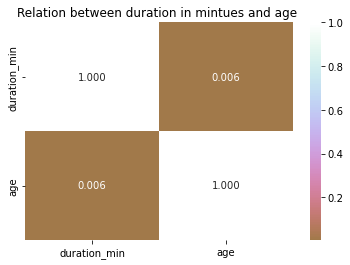

In [34]:
numeric= ['duration_min', 'age']
sns.heatmap(df[numeric].corr(),cmap='cubehelix',annot = True, fmt = '.3f', center = 0);
plt.title("Relation between duration in mintues and age ")

As showen in the above graph , No correlation between trip duration in mintues and age

#### As shown in the graph above, males tend to have the highest subscription and customer rate.

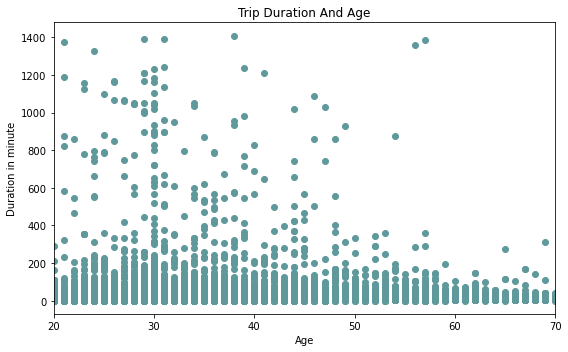

In [35]:
## Scatter plot for trip duratin based on age
plt.figure(figsize=[8,5])
plt.scatter(df['age'], df['duration_min'],color="#5F999C")
plt.xlim([20, 70])
plt.title('Trip Duration And Age')
plt.xlabel('Age')
plt.ylabel('Duration in minute')
plt.tight_layout()

#### Users between the ages of 20 and 40 spend more time biking, which is very reasonable given that biking is affected by the health of the person.

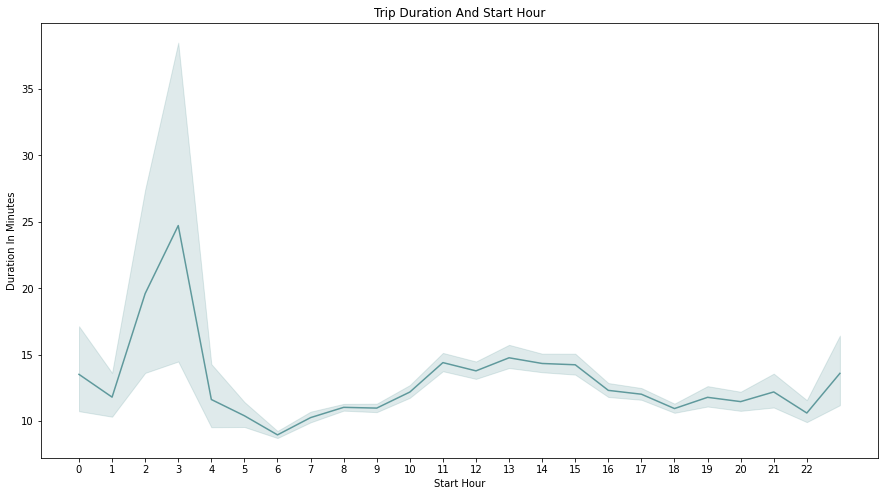

In [36]:
## plot for trip duratin based on start hour
plt.figure(figsize=[15,8])
sns.lineplot(x = df['start_hour'], y = df['duration_min'],color="#5F999C")
plt.xticks(range(0,23))
plt.title('Trip Duration And Start Hour')
plt.xlabel('Start Hour')
plt.ylabel('Duration In Minutes')
plt.show()

#### According to the above chart , the longest bike tripd occur at 3 in the morning, which is illogical. Rarely does anyone ride a bike at three in the morning rather than when bike journeys last the longest.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is no correlation between age and trip durations . but we can say people in their 20s - 40s spend more time biking than others . Looking to the Gender we found that Female bikers bike longer compared to male bikers . Considering user type customers bikes longer on average compared to bikers Subscriber.  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> most trips occur around 8-9am and 5-6pm .These findings are reflect that trips at 8-9am are more likely to be to the work or school, And trips at 5-6pm  are more likely to be from work or school. 



## Multivariate Exploration


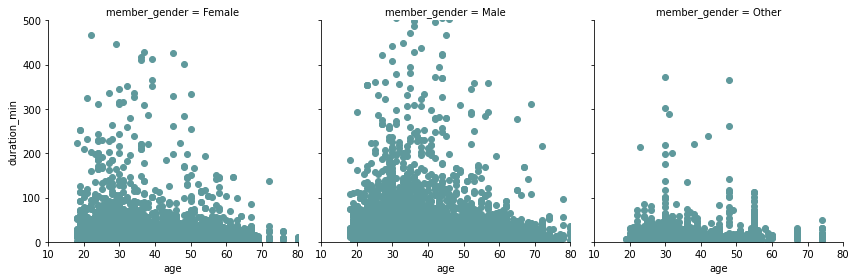

In [37]:
## Plot to compare between trip duration based on gender & age
gg= sns.FacetGrid(data = df, col = 'member_gender', col_wrap = 3, height = 4,
                 xlim = [10, 80], ylim = [0, 500])
gg.map(plt.scatter, 'age', 'duration_min', alpha= 1,color=["#5F999C"])
plt.tight_layout()

#### Males between the ages of 30 and 40 are having the longest bike trip duration .

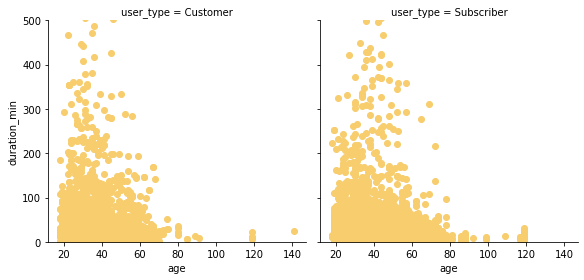

In [38]:
## Plot to compare between trip duration based on user type & age
ut = sns.FacetGrid(data = df, col = 'user_type', palette=["#5F999C",'#EEECCB','#F7CD6E'],col_wrap = 3, height = 4,ylim = [0, 500])
ut.map(plt.scatter, 'age', 'duration_min', alpha= 1,color='#F7CD6E')
plt.tight_layout()

#### Subscriber between the ages of 30 and 55 are having the longest bike trip duration .

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> As we saw in the bivariate section, there were interesting results for usertype, in other words, customers tend to take longer trips, while subscribers tend to take short consistens trips .

### Were there any interesting or surprising interactions between features?

>  Even though the proportion of males in the data set is almost 3x the proportion of female ,But on average females bikes longer than males .Also subscribers are taking large proportion of the data during rush hours, which confirms they bike to and from their work or schools on a daily basis.Also the highest customers proportion in during the rush hours